<img src="/home/ahmedunix/data_Science_Work/Machine_Learning/14_K_Means_Clustering/excercise/k_means_excercise.png">

In [14]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf, keras
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
iris.feature_names[:5]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df['target'] = iris.target

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
df_setosa = df[df.flower_names == 'setosa']
df_versicolor = df[df.flower_names == 'versicolor']
df_virginica = df[df.flower_names == 'virginica']

In [35]:
df_setosa.drop(columns=['sepal length (cm)','sepal width (cm)','target','flower_names'],inplace=True)
df_versicolor.drop(columns=['sepal length (cm)','sepal width (cm)','target','flower_names'],inplace=True)
df_virginica.drop(columns=['sepal length (cm)','sepal width (cm)','target','flower_names'],inplace=True)

/tmp/ipykernel_43913/3592291449.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_43913/3592291449.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'petal width (cm)')

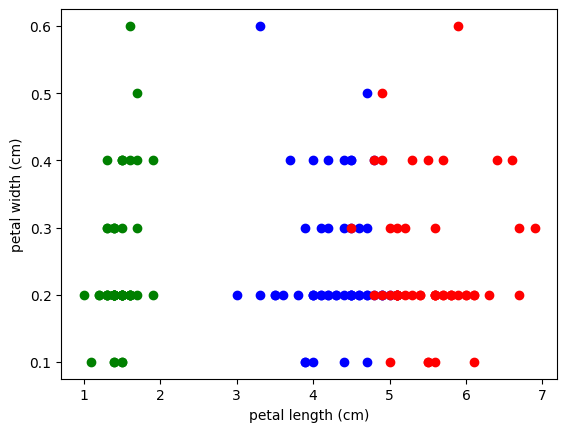

In [39]:
plt.scatter(df_setosa['petal length (cm)'],df_setosa['petal width (cm)'],color='green')
plt.scatter(df_versicolor['petal length (cm)'],df_setosa['petal width (cm)'],color='blue')
plt.scatter(df_virginica['petal length (cm)'],df_setosa['petal width (cm)'],color='red')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')


In [45]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [46]:
df['cluster'] = y_predicted

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names,cluster
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [48]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.62608696, 2.04782609],
       [4.29259259, 1.35925926]])

In [55]:
df_cluster_0 = df[df.cluster == 0]
df_cluster_1 = df[df.cluster == 1]
df_cluster_2 = df[df.cluster == 2]

Text(0, 0.5, 'petal width (cm)')

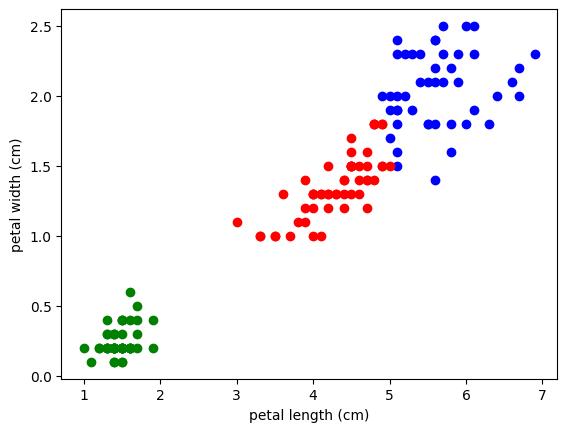

In [59]:
plt.scatter(df_cluster_0['petal length (cm)'],df_cluster_0['petal width (cm)'],color='green')
plt.scatter(df_cluster_1['petal length (cm)'],df_cluster_1['petal width (cm)'],color='blue')
plt.scatter(df_cluster_2['petal length (cm)'],df_cluster_2['petal width (cm)'],color='red')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [62]:
scalar = MinMaxScaler()
scalar.fit(df[['petal length (cm)']])

MinMaxScaler()

In [65]:
df['petal length (cm)'] = scalar.transform(df[['petal length (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names,cluster
0,5.1,3.5,-0.158001,0.2,0,setosa,0
1,4.9,3.0,-0.158001,0.2,0,setosa,0
2,4.7,3.2,-0.160873,0.2,0,setosa,0
3,4.6,3.1,-0.155128,0.2,0,setosa,0
4,5.0,3.6,-0.158001,0.2,0,setosa,0


In [66]:
scalar = MinMaxScaler()
scalar.fit(df[['petal width (cm)']])

MinMaxScaler()

In [68]:
df['petal width (cm)'] = scalar.transform(df[['petal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names,cluster
0,5.1,3.5,-0.158001,0.041667,0,setosa,0
1,4.9,3.0,-0.158001,0.041667,0,setosa,0
2,4.7,3.2,-0.160873,0.041667,0,setosa,0
3,4.6,3.1,-0.155128,0.041667,0,setosa,0
4,5.0,3.6,-0.158001,0.041667,0,setosa,0


In [69]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [70]:
df['cluster'] = y_predicted

In [71]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names,cluster
0,5.1,3.5,-0.158001,0.041667,0,setosa,1
1,4.9,3.0,-0.158001,0.041667,0,setosa,1
2,4.7,3.2,-0.160873,0.041667,0,setosa,1
3,4.6,3.1,-0.155128,0.041667,0,setosa,1
4,5.0,3.6,-0.158001,0.041667,0,setosa,1


In [72]:
km.cluster_centers_

array([[-0.0390812 ,  0.81597222],
       [-0.15621948,  0.06083333],
       [-0.07408349,  0.50961538]])

In [73]:
df_cluster_0 = df[df.cluster == 0]
df_cluster_1 = df[df.cluster == 1]
df_cluster_2 = df[df.cluster == 2]

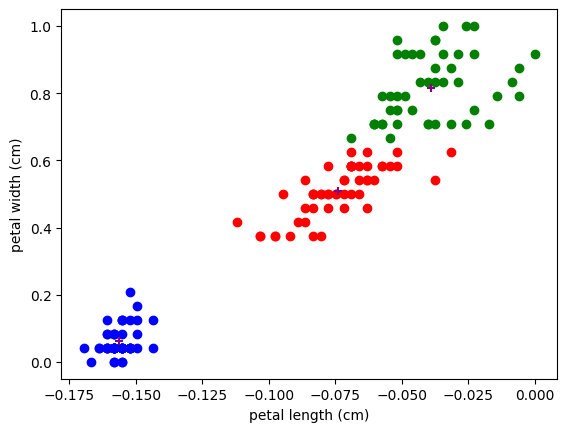

In [76]:
plt.scatter(df_cluster_0['petal length (cm)'],df_cluster_0['petal width (cm)'],color='green')
plt.scatter(df_cluster_1['petal length (cm)'],df_cluster_1['petal width (cm)'],color='blue')
plt.scatter(df_cluster_2['petal length (cm)'],df_cluster_2['petal width (cm)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [77]:
sse = []

k_range = range(1,10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [78]:
sse

[15.412692516047576,
 3.2524955725857803,
 0.8793069645638727,
 0.5185465214381392,
 0.3168529876085549,
 0.25023300424769246,
 0.18293915750992326,
 0.11592255490123517,
 0.10458297614195483]

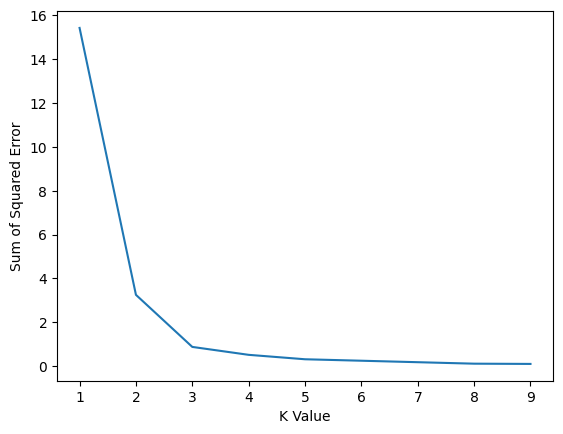

In [79]:
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range,sse)